In [53]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
from mxnet.gluon import nn
npx.set_np()

In [54]:
def corr2d(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = d2l.reduce_sum((X[i: i + h, j: j + w] * K))
            
    return Y

In [55]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = np.array([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

array([[19., 25.],
       [37., 43.]])

In [56]:
class Conv2D(nn.Block):
    def __init__(self, kernel_size, **kwargs):
        super().__init__(**kwargs)
        self.weight = self.params.get('weight', shape=kernel_size)
        self.bias = self.params.get('bias', shape=(1,))
        
    def forward(self, x):
        return corr2d(x, self.weight.data()) + self.bias.data()

In [57]:
X = np.ones((6, 8))
X[:, 2:6] = 0
X

array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]])

In [58]:
K = np.array([[1.0, -1.0]])
K2 = np.array([[-1.0, 1.0]])

In [59]:
Y = corr2d(X, K)
Y2 = corr2d(X, K2)
Y, Y2

(array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]),
 array([[ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  0.]]))

In [60]:
corr2d(X.T, K), corr2d(X.T, K2)

(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

In [61]:
X = np.ones((6, 8))
X[:, 2:6] = 0
X

array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]])

In [62]:
Y = corr2d(X, K)
Y

array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [63]:
corr2d(X.T, K)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [64]:
conv2d = nn.Conv2D(1, kernel_size=(1, 2), use_bias=False)
conv2d.initialize()

X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

for i in range(10):
    with autograd.record():
        Y_hat = conv2d(X)
        l = (Y_hat - Y) ** 2
        
        if i == 0:
            print("Before optimizing: ", d2l.reshape(conv2d.weight.data(), (1, 2)), "\n")
            
    l.backward()
    conv2d.weight.data()[:] -= 3e-2 * conv2d.weight.grad()
    
    if (i + 1) % 2 == 0:
        print(f"Batch {i + 1}, loss {float(l.sum()):.3f}")

Before optimizing:  [[0.00628365 0.04861524]] 

Batch 2, loss 5.154
Batch 4, loss 0.872
Batch 6, loss 0.149
Batch 8, loss 0.026
Batch 10, loss 0.005


In [65]:
print("After optimizing: ", d2l.reshape(conv2d.weight.data(), (1, 2)))

After optimizing:  [[ 0.99117416 -0.9852794 ]]


In [68]:
Z = np.diag(np.array([1, 1, 1, 1, 1]))
Z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [87]:
corr2d(Z, K), Z

(array([[ 1.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0., -1.,  1.,  0.],
        [ 0.,  0., -1.,  1.],
        [ 0.,  0.,  0., -1.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]))

In [70]:
import matplotlib.pyplot as plt

In [81]:
corr2d(Z, K).asnumpy()

array([[ 1.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.],
       [ 0.,  0.,  0., -1.]], dtype=float32)

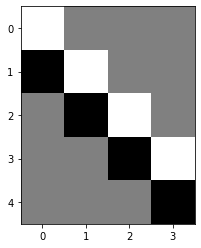

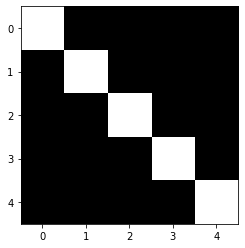

In [86]:
plt.imshow(corr2d(Z, K).asnumpy(), cmap="gray")
plt.show()

plt.imshow(Z.asnumpy(), cmap="gray")
plt.show()

In [92]:
Z.T, Z

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]))

In [93]:
M = np.random.randint(0, 10, (6, 6))

In [95]:
M.T, M

(array([[1, 7, 3, 5, 7, 8],
        [4, 0, 1, 6, 9, 8],
        [3, 6, 2, 7, 5, 0],
        [9, 5, 0, 7, 8, 6],
        [9, 7, 4, 5, 0, 6],
        [4, 2, 5, 9, 5, 1]], dtype=int64),
 array([[1, 4, 3, 9, 9, 4],
        [7, 0, 6, 5, 7, 2],
        [3, 1, 2, 0, 4, 5],
        [5, 6, 7, 7, 5, 9],
        [7, 9, 5, 8, 0, 5],
        [8, 8, 0, 6, 6, 1]], dtype=int64))